K-Means Clustering

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns; sns.set() # for plot styling
import numpy as np

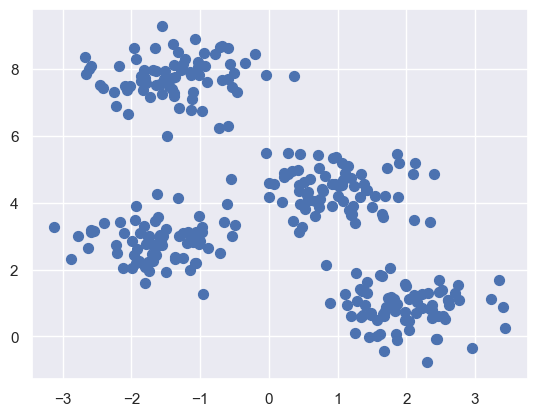

In [5]:
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(x[:, 0], x[:, 1], s=50);

In [6]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, n_init=10)
kmeans.fit(x)
y_means=kmeans.predict(x)

In [7]:
y_means

array([1, 0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 0, 3, 0, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 3, 2, 3, 3,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 3, 0, 2, 2, 2,
       0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3,
       0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3,
       2, 2, 1, 0, 1, 3, 0, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 3, 2, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3,
       1, 2, 0, 2, 1, 3, 0, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 0, 1, 3, 2, 0,
       1, 1, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 0, 3, 2, 1, 2, 3, 0, 2, 0, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 1, 3,
       0, 1, 1, 2, 1, 2, 3, 0, 0, 3, 3, 0, 3, 1, 2, 3, 1, 2, 0, 2, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 3, 2, 1, 3, 2, 2, 2, 1, 1, 0, 3, 3, 2, 1,
       0, 2, 3, 0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1,
       0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 3, 0, 2], d

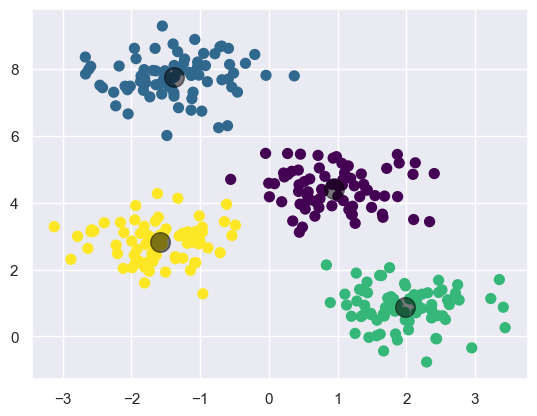

In [8]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

def find_clusters(x, n_clusters, rseed=2):
    # randomly choose cluster
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    
    while True:
        # assign labels based on closest center
        labels = pairwise_distances_argmin(x, centers)
        
        # find new centers from mean of points
        new_centers = np.array([x[labels==i].mean(0) for i in range(n_clusters)])
        
        # check for convergence
        if np.all(centers == new_centers):
            break
            
        centers = new_centers
    
    return centers, labels
centers, labels=find_clusters(x,4)
plt.scatter(x[:,0], x[:,1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

    

Color compression on images using k-means algorithm

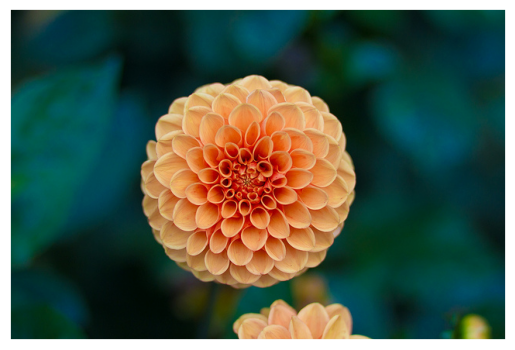

In [9]:
from sklearn.datasets import load_sample_image
china=load_sample_image("flower.jpg")
ax=plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [10]:
china.shape

(427, 640, 3)

In [11]:
china

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [12]:
data=china/255.0 
data=data.reshape(427*640, 3)
data.shape

(273280, 3)

In [13]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [14]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors=data
        #choose a random subset
        rng = np.random.RandomState(0)
        i=rng.permutation(data.shape[0])[:N]
        colors=colors[i]
        R, G, B = data[i].T
        fig, ax=plt.subplots(1,2, figsize=(16, 6))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
        fig.suptitle(title, size=20);

        

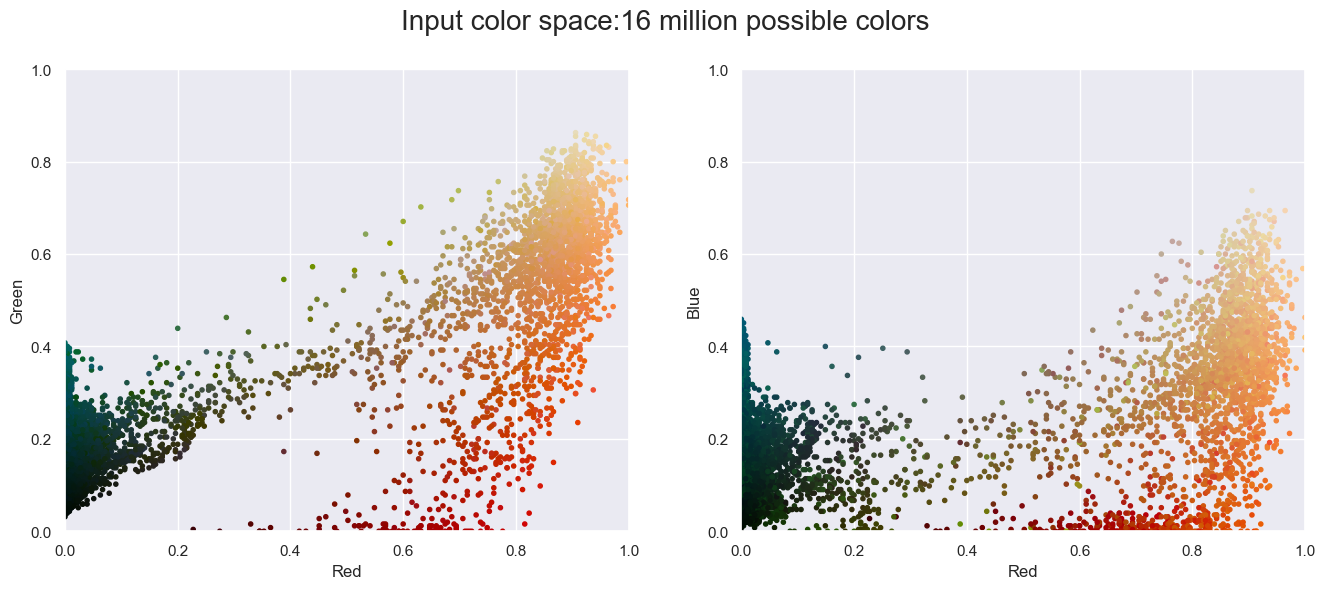

In [15]:
plot_pixels(data,  title='Input color space:16 million possible colors')

In [20]:
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]



In [21]:
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

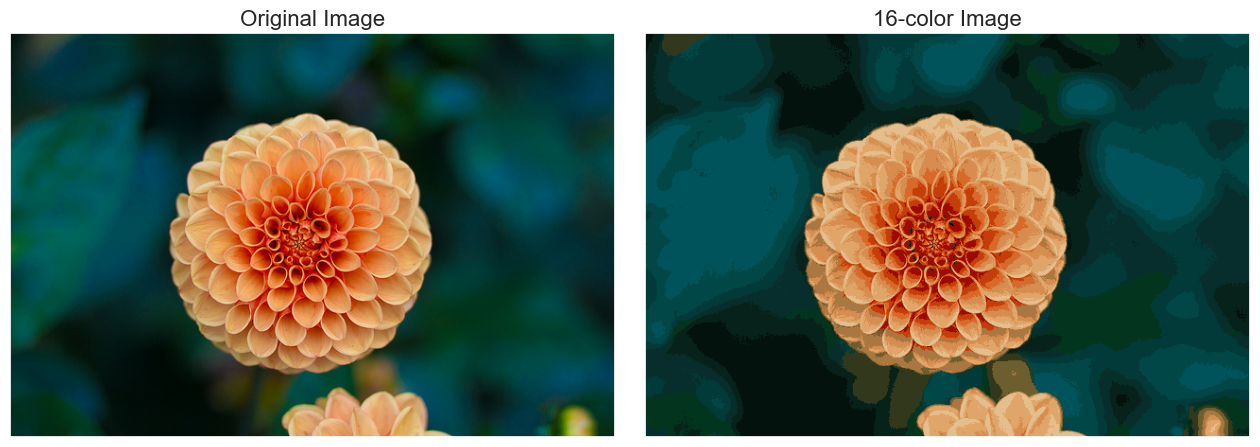

In [22]:
china_recolored=new_colors.reshape(china.shape)
fig, ax=plt.subplots(1,2, figsize=(16,6), 
                     subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Next Image

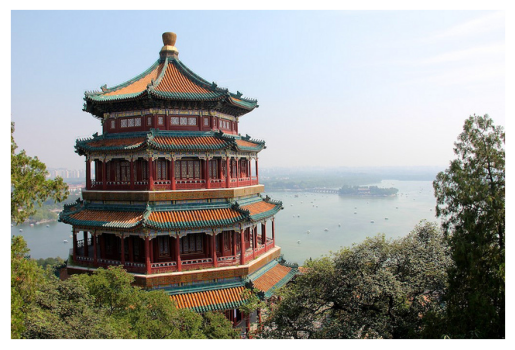

In [26]:
from sklearn.datasets import load_sample_image
df=load_sample_image("china.jpg")
ax=plt.axes(xticks=[], yticks=[])
ax.imshow(df);

In [27]:
df.shape

(427, 640, 3)

In [28]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [29]:
data=china/255.0 
data=data.reshape(427*640, 3)
data.shape

(273280, 3)

In [30]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [31]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors=data
        #choose a random subset
        rng = np.random.RandomState(0)
        i=rng.permutation(data.shape[0])[:N]
        colors=colors[i]
        R, G, B = data[i].T
        fig, ax=plt.subplots(1,2, figsize=(16, 6))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
        fig.suptitle(title, size=20);

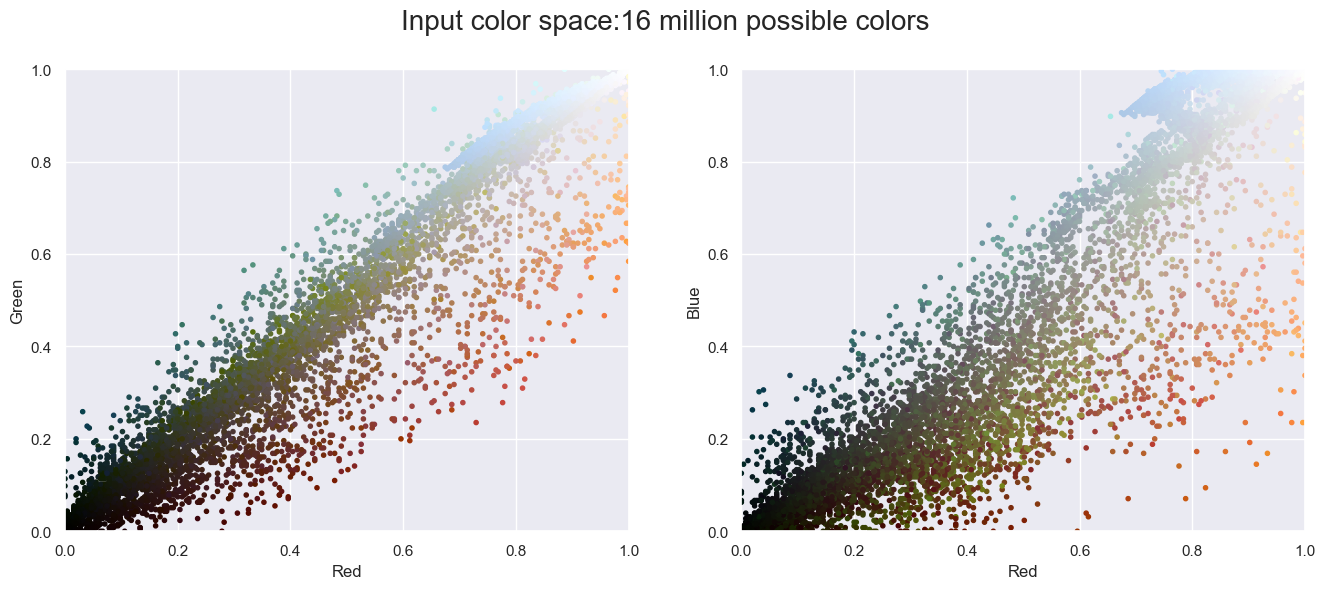

In [32]:
plot_pixels(data,  title='Input color space:16 million possible colors')

In [33]:
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]



In [36]:
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

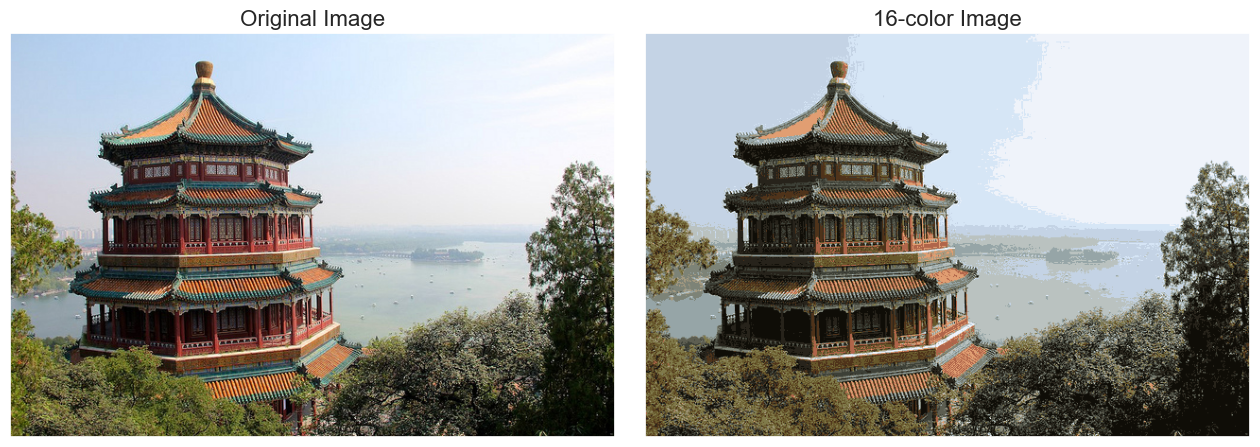

In [38]:
df_recolored=new_colors.reshape(df.shape)
fig, ax=plt.subplots(1,2, figsize=(16,6), 
                     subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(df)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(df_recolored)
ax[1].set_title('16-color Image', size=16);